# 6.3 Geographical Visualizations with Python

# Importing Libraries

In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib
import os 
import folium 
import json 
import matplotlib.pyplot as plt

In [3]:
# This command prompts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [4]:
# Import .JSON file for geographical purposes
country_geo = r'/Users/medhavi/iCloud Drive (Archive)/Desktop/Jinal/6/World Happiness Report/Data/Original Data/world-countries.json'

In [5]:
import json

f = open(r'/Users/medhavi/iCloud Drive (Archive)/Desktop/Jinal/6/World Happiness Report/Data/Original Data/world-countries.json')

# returns JSON object as a dictionary
data = json.load(f)

# Iterating through the json list
for feature in data['features']:
    properties = feature['properties']
    print(properties)

{'name': 'Afghanistan'}
{'name': 'Angola'}
{'name': 'Albania'}
{'name': 'United Arab Emirates'}
{'name': 'Argentina'}
{'name': 'Armenia'}
{'name': 'Antarctica'}
{'name': 'French Southern and Antarctic Lands'}
{'name': 'Australia'}
{'name': 'Austria'}
{'name': 'Azerbaijan'}
{'name': 'Burundi'}
{'name': 'Belgium'}
{'name': 'Benin'}
{'name': 'Burkina Faso'}
{'name': 'Bangladesh'}
{'name': 'Bulgaria'}
{'name': 'The Bahamas'}
{'name': 'Bosnia and Herzegovina'}
{'name': 'Belarus'}
{'name': 'Belize'}
{'name': 'Bolivia'}
{'name': 'Brazil'}
{'name': 'Brunei'}
{'name': 'Bhutan'}
{'name': 'Botswana'}
{'name': 'Central African Republic'}
{'name': 'Canada'}
{'name': 'Switzerland'}
{'name': 'Chile'}
{'name': 'China'}
{'name': 'Ivory Coast'}
{'name': 'Cameroon'}
{'name': 'Democratic Republic of the Congo'}
{'name': 'Republic of the Congo'}
{'name': 'Colombia'}
{'name': 'Costa Rica'}
{'name': 'Cuba'}
{'name': 'Northern Cyprus'}
{'name': 'Cyprus'}
{'name': 'Czech Republic'}
{'name': 'Germany'}
{'name':

In [6]:
# Defining path

path = r'/Users/medhavi/iCloud Drive (Archive)/Desktop/Jinal/6/World Happiness Report'

In [7]:
# Importing dataframe 
df_merged_data = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'cleaned_merged_dataset_2015to2022.csv'))

In [8]:
df_merged_data.head()

,Country Rank,Year,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom (Life Choices),Trust (Government Corruption),Generosity (Donations to Charity)
0,1,2015,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2,2015,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,3,2015,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,4,2015,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,5,2015,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [9]:
df_merged_data.shape

(1228, 11)

In [10]:
df_merged_data.columns

Index(['Country Rank', 'Year', 'Country', 'Region', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family (Social Support)',
       'Health (Life Expectancy)', 'Freedom (Life Choices)',
       'Trust (Government Corruption)', 'Generosity (Donations to Charity)'],
      dtype='object')

# Data wrangling

In [11]:
# select only the necessary columns and put them in a list called columns
columns = ["Country", "Year", "Happiness Score", "Economy (GDP per Capita)", "Family (Social Support)",  "Health (Life Expectancy)", "Freedom (Life Choices)"]

In [12]:
# create a subset
Country_rec = df_merged_data[columns]

In [13]:
Country_rec.head()

,Country,Year,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom (Life Choices)
0,Switzerland,2015,7.587,1.39651,1.34951,0.94143,0.66557
1,Iceland,2015,7.561,1.30232,1.40223,0.94784,0.62877
2,Denmark,2015,7.527,1.32548,1.36058,0.87464,0.64938
3,Norway,2015,7.522,1.45900,1.33095,0.88521,0.66973
4,Canada,2015,7.427,1.32629,1.32261,0.90563,0.63297


# Data cleaning, Conduct consistency checks

In [14]:
#check for missing values
Country_rec.isnull().sum()

Country                     0
Year                        0
Happiness Score             0
Economy (GDP per Capita)    0
Family (Social Support)     0
Health (Life Expectancy)    0
Freedom (Life Choices)      0
dtype: int64

In [15]:
# No missing values have been found

In [16]:
#check for duplicates checks
dups = Country_rec.duplicated()

In [17]:
dups.shape

(1228,)

In [18]:
# No duplicates have been found

<Axes: xlabel='Happiness Score', ylabel='Count'>

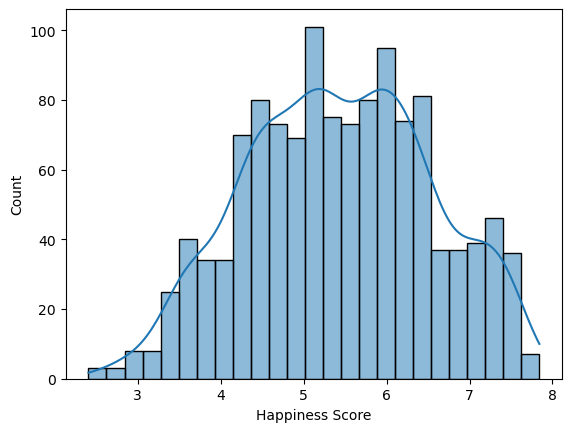

In [19]:
#extreme values checks
sns.histplot(Country_rec['Happiness Score'], bins=25, kde = True)

In [20]:
# It looks noramal distribution

<Axes: xlabel='Economy (GDP per Capita)', ylabel='Count'>

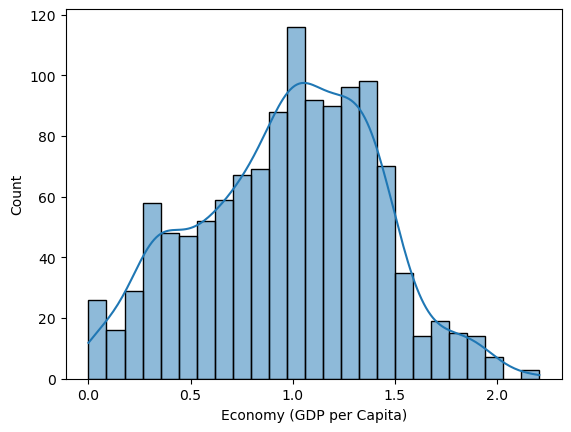

In [21]:
#extreme values checks
sns.histplot(Country_rec['Economy (GDP per Capita)'], bins=25, kde = True)

<Axes: xlabel='Family (Social Support)', ylabel='Count'>

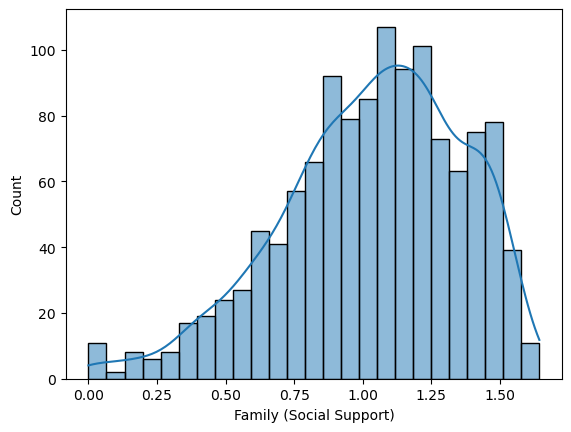

In [22]:
#extreme values checks
sns.histplot(Country_rec['Family (Social Support)'], bins=25, kde = True)

In [23]:
#left-skewed curve

<Axes: xlabel='Freedom (Life Choices)', ylabel='Count'>

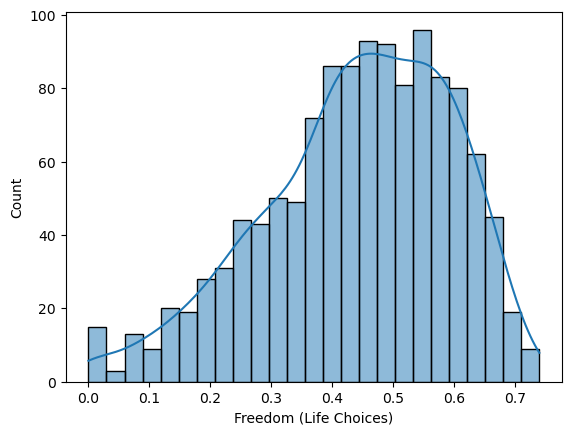

In [24]:
sns.histplot(Country_rec['Freedom (Life Choices)'], bins=25, kde = True)

In [25]:
# There are no extreme values for each variables.

# Create a choropleth map

In [26]:
# Subset the data for the year 2015
df_merged_data_2015 = Country_rec[Country_rec["Year"] == 2015]

In [27]:
df_merged_data_2015.head()

,Country,Year,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom (Life Choices)
0,Switzerland,2015,7.587,1.39651,1.34951,0.94143,0.66557
1,Iceland,2015,7.561,1.30232,1.40223,0.94784,0.62877
2,Denmark,2015,7.527,1.32548,1.36058,0.87464,0.64938
3,Norway,2015,7.522,1.45900,1.33095,0.88521,0.66973
4,Canada,2015,7.427,1.32629,1.32261,0.90563,0.63297


In [28]:
for feature in data['features']:
    properties = feature['properties']
    print(properties)

{'name': 'Afghanistan'}
{'name': 'Angola'}
{'name': 'Albania'}
{'name': 'United Arab Emirates'}
{'name': 'Argentina'}
{'name': 'Armenia'}
{'name': 'Antarctica'}
{'name': 'French Southern and Antarctic Lands'}
{'name': 'Australia'}
{'name': 'Austria'}
{'name': 'Azerbaijan'}
{'name': 'Burundi'}
{'name': 'Belgium'}
{'name': 'Benin'}
{'name': 'Burkina Faso'}
{'name': 'Bangladesh'}
{'name': 'Bulgaria'}
{'name': 'The Bahamas'}
{'name': 'Bosnia and Herzegovina'}
{'name': 'Belarus'}
{'name': 'Belize'}
{'name': 'Bolivia'}
{'name': 'Brazil'}
{'name': 'Brunei'}
{'name': 'Bhutan'}
{'name': 'Botswana'}
{'name': 'Central African Republic'}
{'name': 'Canada'}
{'name': 'Switzerland'}
{'name': 'Chile'}
{'name': 'China'}
{'name': 'Ivory Coast'}
{'name': 'Cameroon'}
{'name': 'Democratic Republic of the Congo'}
{'name': 'Republic of the Congo'}
{'name': 'Colombia'}
{'name': 'Costa Rica'}
{'name': 'Cuba'}
{'name': 'Northern Cyprus'}
{'name': 'Cyprus'}
{'name': 'Czech Republic'}
{'name': 'Germany'}
{'name':

# Country vs Happiness score

In [29]:
# Create a choropleth map based on the subset
map  = folium.Map(location = [100,0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo,
    data = df_merged_data_2015,
    columns = ['Country', 'Happiness Score'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', nan_fill_color = 'white', fill_opacity=0.6, line_opacity=0.1,
    legend_name = 'Happiness Ranking').add_to(map)
folium.LayerControl().add_to(map)

map 

In [30]:
# The continent North America has the coutries with the higest score, as well, Brazil, Australia, New Zealand, Norway, Sweden, Finland,United Kigdom, and Ireland, and Netherlands. the lowest score, countries are in some African countries and some in the South Asia.

In [31]:
map.save(os.path.join(path,'4 Analysis /Visualizations', 'country_happinessscore.html'))

# Country vs Economy (GDP per Capita)

In [32]:
# Setup a folium map at a high-level zoom
map = folium.Map(location=[100, 0], zoom_start=1.5)

# Choropleth maps bind Pandas Data Frames and json geometries. This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data=country_geo, 
    data=df_merged_data_2015,
    columns=['Country', 'Economy (GDP per Capita)'],
    key_on='feature.properties.name',  # Update the key_on parameter based on the correct key path
    fill_color='YlOrBr',
    fill_opacity=0.6,
    line_opacity=0.1,
    legend_name="Economy (GDP per Capita)",
    highlight=True,  # Add this line to enable highlighting for repeated countries
    nan_fill_color='gray',  # Add this line to set a color for missing values
    reset=True  # Add this line to reset the map between frames
).add_to(map)

folium.LayerControl().add_to(map)

map

In [33]:
# the country with high GDP per capita was Norway follow by USA, Canada, Australia, and some of Europe and some of Asia.

In [34]:
map.save(os.path.join(path,'4 Analysis /Visualizations', 'country_Economy (GDP per Capita).html'))

In [ ]:
# Question 8: Does the analysis lead you to any new research questions?: No
# Does the analysis answer any of your existing research questions? 
# Yes, this map makes us easily indentify the answers for the questions like; Which countries are on the Top 10 Happiness Countries list?", or "Which countries are on the Top 10 Progressive Countries list?
